<a href="https://colab.research.google.com/github/Dshivank/EDA-Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> GLOBAL TERRORISM DATABASE </b>


## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# Introduction

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. In this project we are going to analyze the Global Terrorism Data in order to find out valuable insights.

# Project Objective

This project provides an interactive visualization platform of the global terrorism attacks, to better support the researchers with deeper understandings of the patterns and regularities of the current world terrorism conflicts. This system seeks and presents potential correlations, clustering performances and feature rankings of different countries and parties, associated with types of attacks and casualties.

# Importing Necessary Modules and Libraries
 

Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib :- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

Numpy :- NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

Scipy :- This provides more utility functions for optimization, stats and signal processing.Like NumPy, SciPy is open source so we can use it freely.

Plotly :- The plotly is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Seaborn :- Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

Datetime :- The datetime module supplies classes for manipulating dates and times. While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

In [1]:
# We will start with importing some important libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from scipy.interpolate import interp1d

%matplotlib inline

## <b> Getting the data ready for Classification </b>

Now, we need to load our data from the external source, which in this case is uploaded to the drive.

In [2]:
# Mounting the Google Drive to access the data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# The variable file_path contains the path of dataset stored in the drive. 
file_path = "/content/drive/MyDrive/Global Terrorism Data.csv"

# Importing terrorism_data File.
terrorism_data = pd.read_csv(file_path, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## <b> Analysing the data </b>

Understanding the problem : Here we will look all the variables and do philosophical analysis about their meaning and importance for the problem.

We will look at each relevant variable and get to know more about it.

Now we are going to overview the data by checking the shape, size and understanding the column names.

In [ ]:
# Checking the shape of the dataframe
print(terrorism_data.shape)

# Displaying the first few rows of data.
terrorism_data.head(2)

(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
# Using the column attribute to see what type of information is stored in the terrorism_data file.

terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# By the info method we can check the Nan values and the datatype of all the columns in our dataframe

terrorism_data.info(verbose= True, null_counts = True)

# By using (null_counts = True) we can get all the Nan values of our columns.
# Since the data was really big in size, we used (verbose= True) to get the information of the datatypes of all the columns.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [ ]:
# The describe() function applies basic statistical computations on the dataset like extreme values,count of data points standard deviation, etc.

terrorism_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as attacktype2 and targtype3). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Moreover, it seems like there are many categorical variables by looking max values. 

## <b> Data Pre-Processing and cleaning

Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it. Like here we have defined a new dataframe (terrorism_data_new) which contains only those columns which are needed for our analysis.

Extracting meaningful chunks out of the file by dropping unnecessary columns.

In [ ]:
# Now we have created a new dataframe (i.e terrorism_data_new) in which we have selected only those columns which we need for our analysis.

terrorism_data_new = terrorism_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city','latitude', 
                                     'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound']]

In [ ]:
# Checking our new updated dataframe

terrorism_data_new.head(2)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0


In [ ]:
# Checking the number of rows and columns in terrorism_data_new.

terrorism_data_new.shape

(181691, 16)

Now, we have renamed the columns in our new dataframe for better understanding also we have used the fillna() function to handle the Nan value.

In [ ]:
# Now we will be renaming our columns in the new dataframe

terrorism_data_new = terrorism_data_new.rename(columns= {'iyear' : 'year','imonth' : 'month', 'iday' : 'day', 'country_txt' : 'country', 
                                                         'region_txt' : 'region', 'provstate' : 'state', 'attacktype1_txt' : 'attack_type', 
                                                         'targtype1_txt' : 'target_type', 'gname' : 'gang_name', 'weaptype1_txt' : 'weapon_type', 
                                                         'nkill' : 'no_of_kills', 'nwound' : 'wounds' })

In [ ]:
# Checking if the columns are renamed

terrorism_data_new.head(2)

,year,month,day,country,region,state,city,latitude,longitude,success,attack_type,target_type,gang_name,weapon_type,no_of_kills,wounds
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0


In [ ]:
# By looking at the data we figured out that many columns contains Nan values throughout the data.
 
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#Checking the information of the new dataset to analyse the Nan values.

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  171378 non-null  float64
 15  wounds       165380 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Handeling the Nan values using the fillna() method

# Replacing the 'Nan' values in [state] columns with 'unknown'
terrorism_data_new['state'] = terrorism_data_new['state'].fillna('unknown')

# Replacing the 'Nan' values in [city] columns with 'unknown'
terrorism_data_new['city'] = terrorism_data_new['city'].fillna('unknown')

# Replacing the 'Nan' values in [No_of_kills] columns with '0'
terrorism_data_new['no_of_kills'] = terrorism_data_new['no_of_kills'].fillna(0)

# Replacing the 'Nan' values in [wounds] columns with '0'
terrorism_data_new['wounds'] = terrorism_data_new['wounds'].fillna(0)


In [ ]:
# checking for the Nan values after replacing.

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  181691 non-null  float64
 15  wounds       181691 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Using isnull().sum just to make sure that there is no null value present in the dataset. 

terrorism_data_new.isnull().sum()


year              0
month             0
day               0
country           0
region            0
state             0
city              0
latitude       4556
longitude      4557
success           0
attack_type       0
target_type       0
gang_name         0
weapon_type       0
no_of_kills       0
wounds            0
dtype: int64

## <b> Exploratory Data Analysis </b>

<b>**Exploratory Data Analysis**  </b>:- Exploratory Data Analysis is the approach of analysing data, gathering and summarizing the important characteristics of the information and using simple visualisation that make it easier to understand. 


<b> **Data Visualisation** </b> :- Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

<b> **Word Cloud** </b> :- Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  if __name__ == '__main__':


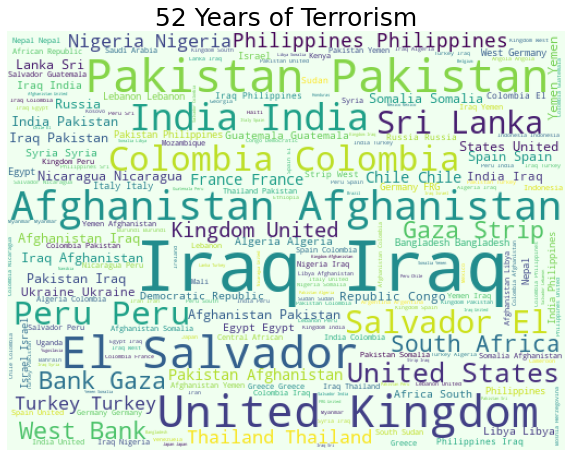

In [ ]:
# Importing important liberaries for plotting word cloud.

from wordcloud import WordCloud
from scipy import signal

# Plotting the word cloud for country
# The size of the text of every country indicates the frequency of the attacks.

city = terrorism_data_new.country.dropna(False)
plt.subplots(figsize=(10,10))

wordcloud = WordCloud(background_color = '#F0FFF0',width = 512,height = 384).generate(' '.join(city))
plt.title('52 Years of Terrorism', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud)

# Below is the Word Cloud obtained by all countries.

## <b> Total number of attacks in every year by region


In [ ]:
attacks_per_year = terrorism_data_new.groupby(['year', 'region']).count().unstack()['country']

# Using groupby function on 'year' and 'region' columns then counting the number of attacks.
# Using Unstack function  to pivot the level of the indexed columns in a stacked dataframe.

In [ ]:
# Displaying the DataFrame recieved.
attacks_per_year

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1.0,7.0,NaN,2.0,12.0,28.0,472.0,65.0,1.0,10.0,3.0,50.0
1971,1.0,5.0,NaN,1.0,5.0,55.0,247.0,24.0,NaN,6.0,2.0,125.0
1972,8.0,3.0,NaN,NaN,1.0,53.0,73.0,33.0,1.0,16.0,4.0,376.0
1973,1.0,6.0,NaN,2.0,1.0,19.0,64.0,83.0,1.0,2.0,4.0,290.0
1974,1.0,11.0,NaN,4.0,2.0,42.0,111.0,81.0,2.0,3.0,7.0,317.0
1975,NaN,9.0,NaN,12.0,NaN,44.0,159.0,55.0,4.0,7.0,12.0,438.0
1976,NaN,45.0,NaN,2.0,NaN,55.0,125.0,91.0,4.0,12.0,11.0,578.0
1977,NaN,24.0,NaN,4.0,2.0,211.0,149.0,119.0,2.0,8.0,29.0,771.0
1978,2.0,199.0,NaN,35.0,2.0,128.0,117.0,222.0,2.0,44.0,46.0,729.0


Text(0.5, 0, 'Year')

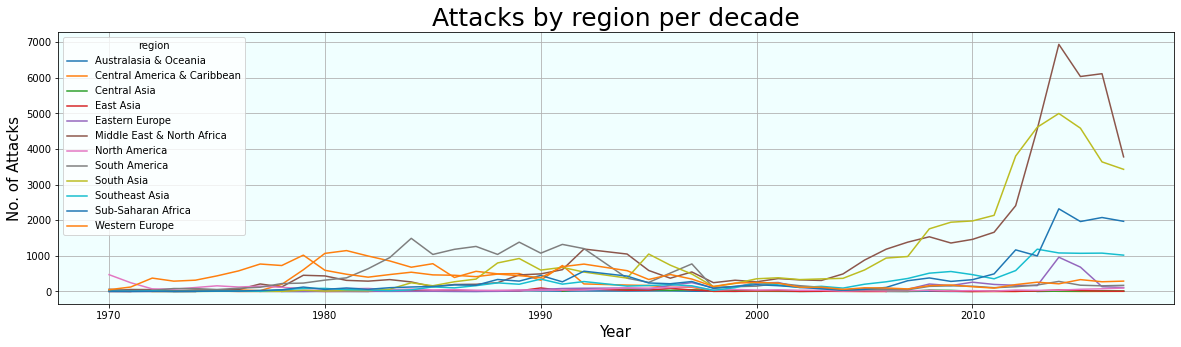

In [ ]:
# Plotting the Area Chart
attacks_per_year.plot(grid = True, kind='line', figsize=(20,5)).patch.set_facecolor('#f0ffff')

# Setting a title for the chart.
plt.title('Attacks by region per decade', fontsize = 25)

# Setting the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

**Observation** :- By looking at the graph we analysed that attacks were taking place at nearly constant rate across the world for 4 decades, but in 2010 clearly a huge spike came in Middle East and South Asia region. Although, it remained same in other regions of the world. By looking at the data, we will further analyse these regions in our project.

## <b> Analysing the trend across the years

In [ ]:
yearly_trend = terrorism_data_new.year.value_counts().sort_index(ascending=True)

# Using value_counts() function returns the counts of unique values for the column 'year'.

In [ ]:
# Displaying the DataFrame recieved.
yearly_trend

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

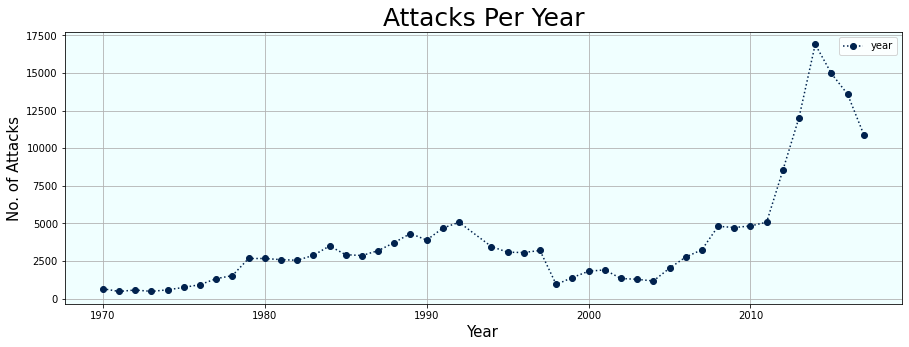

In [ ]:
# Plotting the line Chart to show the trend across the year
yearly_trend.plot(kind = 'line', marker = 'o', ls = ':', grid = True, colormap = "cividis", figsize=(15,5)).patch.set_facecolor('#f0ffff')

# setting a title of the chart.
plt.title('Attacks Per Year', fontsize = 25)

# setting the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# showing legends on the plot
plt.legend()

# Below is the Graph obtained by 2 indicators as line chart.

**Observation** :- The graph shows that attacks were slowly rising from 1970 to 1990 and then a dip took place till 1998 and then a sudden spike in attacks were to be seen after 2010 across the world.


## <b> Analyzing the attacks in the year 2014 region-wise

In [ ]:
attacks_in_2014 = terrorism_data_new[terrorism_data_new['year'] == 2014]
attack_2014 = attacks_in_2014['region'].value_counts().to_frame()

# Using value_counts() function returns the counts of unique values for the column 'region'.
# to_frame() function is used to convert the given series object to a dataframe

Text(0.5, 0, 'Year')

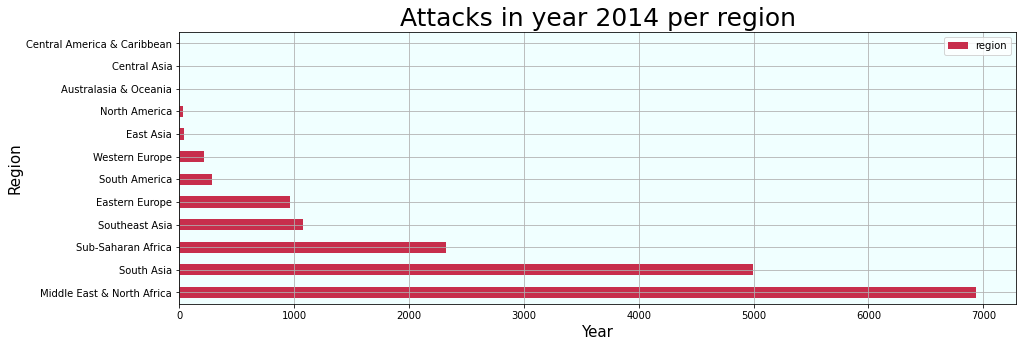

In [ ]:
# Plotting the line Chart to show the trend.
palette = sns.color_palette("Spectral", 12).as_hex()
attack_2014.plot(kind = 'barh',color = palette, grid = True, figsize=(15,5)).patch.set_facecolor('#f0ffff')

# setting a title of the chart.
plt.title('Attacks in year 2014 per region', fontsize = 25)

# setting the x and y axis labels
plt.ylabel('Region', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Below is the Graph obtained by indicators as horizontal bar graph.

**Observation** :- As can be seen from the graph that there is huge gap in frequency of attacks happening in least and most vulnerable regions across the world. Also, it shows that Middle East and Asian part is the most vulnerable. If we analyse it further, we got to know that these regions have countries which are developing or under-developed. So, richer nations need to come together to help these regions fighting the menace.

## <b> Top 10 countries which were most attacked

In [ ]:
top_10_countries = terrorism_data_new['country'].value_counts().head(10)

# Using value_counts() function returns the counts of unique values for the column 'country'.
# Head(10) for selecting the top 10 countries.

In [ ]:
# Displaying the DataFrame recieved.
top_10_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country, dtype: int64

Text(0, 0.5, 'Countries')

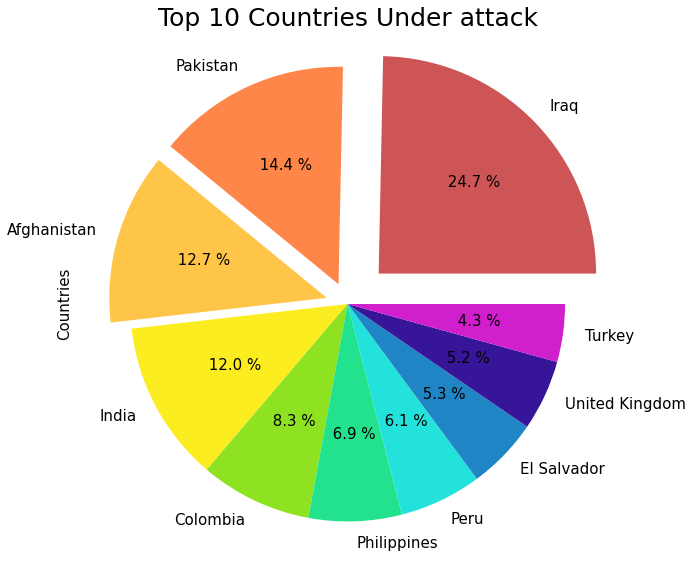

In [ ]:
# Defining the explode
myexplode = [0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0 ]

color_set = ["#CD5555","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]

# Plotting the Pie Chart
top_10_countries.plot(kind = 'pie', figsize=(20,10), explode = myexplode,autopct ='% 1.1f %%',colors = color_set, textprops={'fontsize': 15})

# Set a title of the chart.
plt.title('Top 10 Countries Under attack', fontsize = 25)

# Set the y label
plt.ylabel('Countries', fontsize = 15)

# Grouping by countries, and plotting pie chart

**Observation** :- Iraq was the most attacked country across the world with 24636 attacks.

## <b> Top 10 states under attack

In [ ]:
top_10_states = terrorism_data_new['state'].value_counts().head(10)

# Using value_counts() function returns the counts of unique values for the column 'state'.
# Head(10) for selecting the top 10 states.

In [ ]:
# Displaying the DataFrame recieved.
top_10_states

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

Text(0, 0.5, 'States')

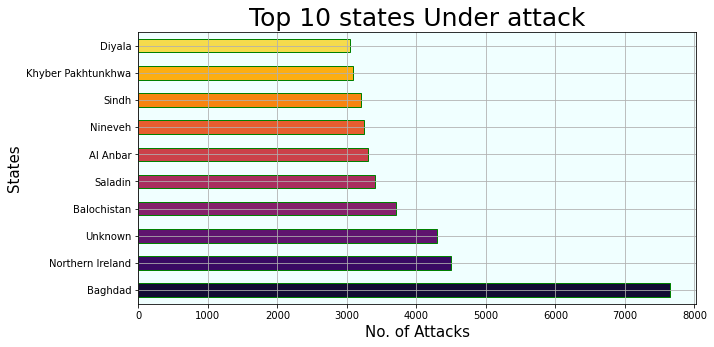

In [ ]:
# Plotting the horizontal Bar graph

palette = sns.color_palette("inferno", 10).as_hex()
top_10_states.plot(kind = 'barh', figsize=(10,5), color= palette, edgecolor='green', grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Top 10 states Under attack', fontsize = 25)

# Set the x and y axis labels.
plt.xlabel('No. of Attacks', fontsize = 15)
plt.ylabel('States', fontsize = 15)

**Observation** :- Baghdad state which is the capital of Iraq is the most attacked in the world with 7645 attacks. 

## <b>  Which attack type is the most common**

In [ ]:
common_attack_type = terrorism_data_new['attack_type'].value_counts()

# Using value_counts() function returns the counts of unique values for the column 'attack_type'.

In [ ]:
# Displaying the DataFrame recieved.
common_attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

Text(0, 0.5, 'No. of attacks')

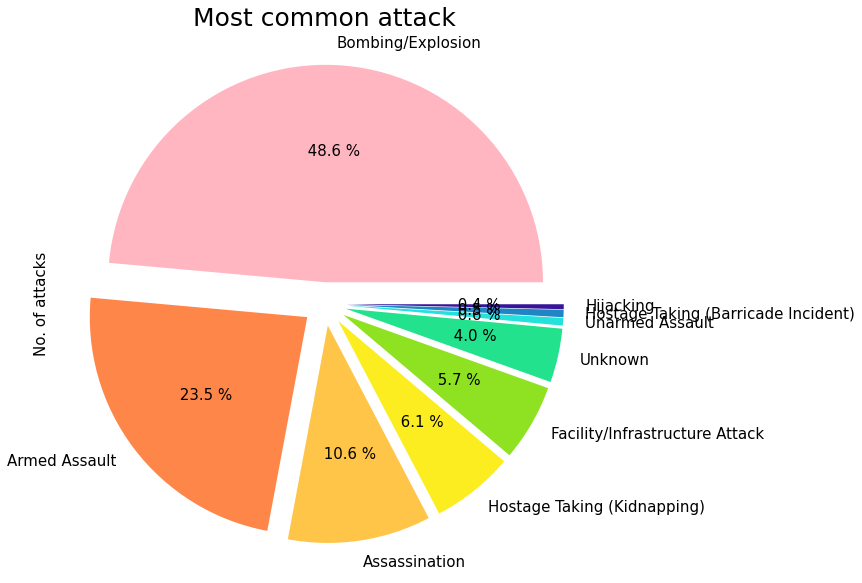

In [ ]:
# Defining the explode
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ]
color_set = ["#FFB6C1","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599"]

# Plotting the Pie Chart
common_attack_type.plot(kind = 'pie',figsize=(20,10), explode = myexplode, autopct ='% 1.1f %%', colors = color_set, textprops={'fontsize': 15})

# Set a title of the chart.
plt.title('Most common attack', fontsize = 25)

# Set the y label
plt.ylabel('No. of attacks', fontsize = 15)

**Observation** :- Bombing and Explosions are the most preferable attack type used by the terrorists. Around 50% of the terrorist groups are using this attack type.

## <b> Which gang attacked the most <b>

In [ ]:
leading_gangs = terrorism_data_new['gang_name'].value_counts().head(10)

# Using value_counts() function returns the counts of unique values for the column 'gang_name'.
# Head(10) for selecting the top 10 gangs.

In [ ]:
# Displaying the DataFrame recieved.
leading_gangs

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gang_name, dtype: int64

Text(0, 0.5, 'No. of attacks')

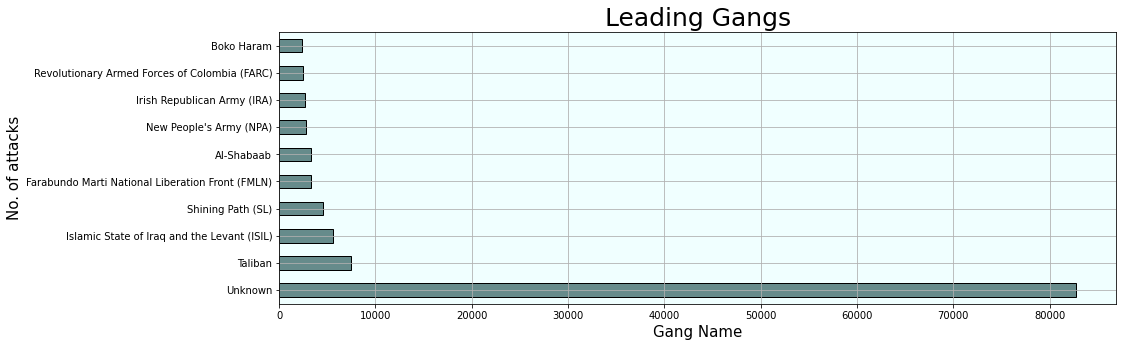

In [ ]:
# Plotting the horizontal Bar graph
leading_gangs.plot(kind = 'barh', figsize=(15,5), color = '#668B8B' , edgecolor='black', grid = True).patch.set_facecolor('#f0ffff')

# Set a title for our chart
plt.title('Leading Gangs', fontsize = 25)

# Set the x and y axis label
plt.xlabel('Gang Name', fontsize = 15)
plt.ylabel('No. of attacks', fontsize = 15)

**Observation** :- The most leading gang of the attacks is Taliban. Also, their are more then 80% of the attacks which are done by unknown terrorist which seems to be a huge concern.

## <b> Analysing which attack type is used by the most deadly gang  'Taliban'

In [ ]:
# Installing the needed library

!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Defining the function for ploting the graph
# We have used a def keyword to define a function

gname = "Taliban"
def treeplot(data,gang_name):
    plt.subplots(figsize=(10, 10))
    w_t = pd.DataFrame(terrorism_data_new[terrorism_data_new['gang_name']==gname]['weapon_type'].value_counts())
    w_t.reset_index(level=0,inplace=True)
    t = squarify.plot(sizes=w_t["weapon_type"],label=w_t["index"],alpha=0.8)
    plt.show()

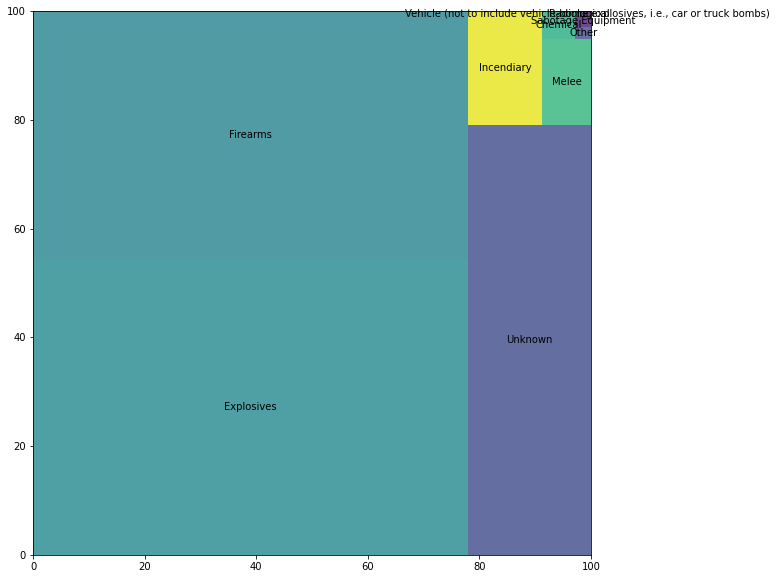

In [ ]:
# Plotting the Heat Map
treeplot(terrorism_data_new,"Taliban")

**Observation** :- It is clearly visible from the above tree map that Firearms and Explosives are the most used attack type used by the most deadly gang Taliban. so, their should be stricter rules to prevent the movement of firearms and explosives into and from the countries.

## <b> What was the most common target of the terrorist <b>

In [ ]:
common_targets = terrorism_data_new['target_type'].value_counts().head(10)

# Using value_counts() function returns the counts of unique values for the column 'target_type'.
# Head(10) for selecting the top 10 target_types of the terrorist.

In [ ]:
# Displaying the DataFrame recieved.
common_targets

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: target_type, dtype: int64

Text(0, 0.5, 'No. of attacks')

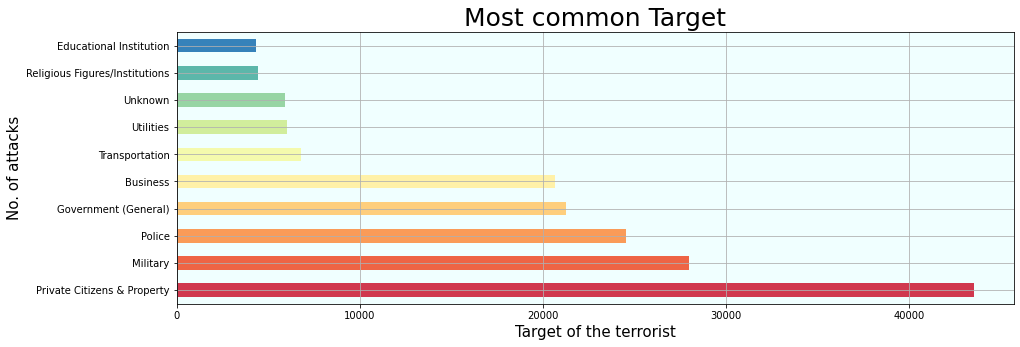

In [ ]:
# Plotting the horizontal Bar graph

palette = sns.color_palette("Spectral", 10).as_hex()
common_targets.plot(kind = 'barh',figsize=(15,5), color = palette , grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Most common Target', fontsize = 25)

# Set the x and y axis label
plt.xlabel('Target of the terrorist', fontsize = 15)
plt.ylabel('No. of attacks', fontsize = 15)

**Observation** :- Private Citizens and Property are constant target of the terrorist, tighter security and surveillance should be provided, especially in densely populated regions

## <b> Which year has the most number of casualties

In [ ]:
casualties = terrorism_data_new.groupby('year').sum()['no_of_kills']

# Using groupby function on 'year' columns then counting the number of people killed.

In [ ]:
# Displaying the DataFrame recieved.
casualties

year
1970      174.0
1971      173.0
1972      566.0
1973      370.0
1974      539.0
1975      617.0
1976      674.0
1977      456.0
1978     1459.0
1979     2100.0
1980     4400.0
1981     4851.0
1982     5136.0
1983     9444.0
1984    10450.0
1985     7094.0
1986     4976.0
1987     6482.0
1988     7208.0
1989     8152.0
1990     7148.0
1991     8429.0
1992     9742.0
1994     7690.0
1995     6103.0
1996     6966.0
1997    10924.0
1998     4688.0
1999     3393.0
2000     4403.0
2001     7729.0
2002     4805.0
2003     3317.0
2004     5743.0
2005     6331.0
2006     9380.0
2007    12824.0
2008     9157.0
2009     9273.0
2010     7827.0
2011     8246.0
2012    15497.0
2013    22273.0
2014    44490.0
2015    38853.0
2016    34871.0
2017    26445.0
Name: no_of_kills, dtype: float64

Text(0.5, 0, 'Year')

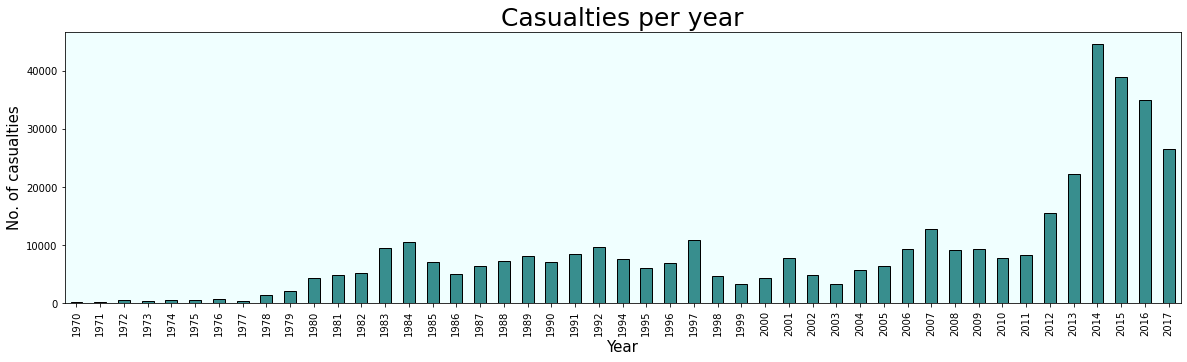

In [ ]:
# Plotting the Bar graph
casualties.plot(kind = 'bar', figsize=(20,5), color = '#388E8E', edgecolor='black').patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Casualties per year', fontsize = 25)

# Set the x and y axis label
plt.ylabel('No. of casualties', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

**Observation** :- As clearly visible from the above graph, year 2014 having the most number of casualties, with the most number of attacks.

## <b> Comparing the number of casualties and wounded people across every region. </b>

In [ ]:
wound_VS_casualties = terrorism_data_new.groupby('region')[['no_of_kills','wounds']].sum().sort_values(by = 'no_of_kills',ascending = False)

# Using groupby function on 'region' columns then counting the number of people killed and wounded.
# Using the sort_value function to sort the values in descending.

In [ ]:
# Displaying the DataFrame recieved.
wound_VS_casualties

,no_of_kills,wounds
region,,
Middle East & North Africa,137642.0,214308.0
South Asia,101319.0,141360.0
Sub-Saharan Africa,78386.0,52857.0
South America,28849.0,16704.0
Central America & Caribbean,28708.0,8991.0
Southeast Asia,15637.0,26259.0
Eastern Europe,7415.0,12045.0
Western Europe,6694.0,18332.0
North America,4916.0,21531.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

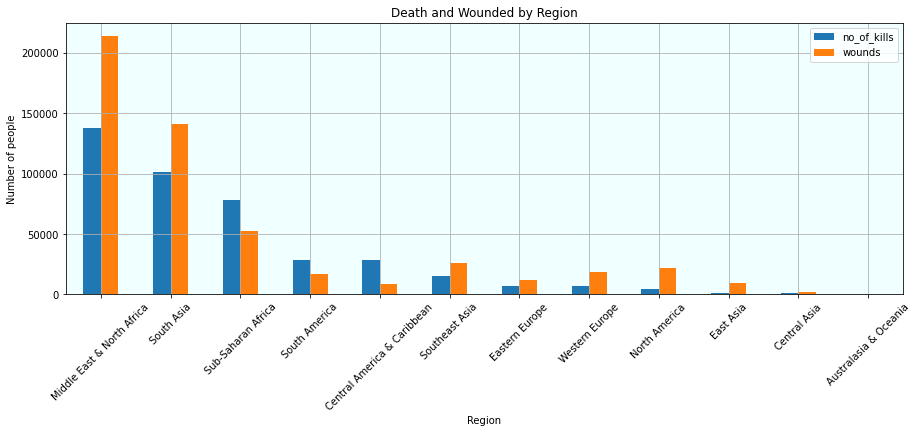

In [ ]:
wound_VS_casualties.plot(kind = 'bar', grid = True, figsize = (15,5),stacked = False, 
                         xlabel = 'Region', ylabel = 'Number of people', title = "Death and Wounded by Region").patch.set_facecolor('#f0ffff')

plt.xticks(rotation = 45, fontsize = 10)

## <b> success v/s failed attacks country wise

In [ ]:
attacks =  terrorism_data_new.groupby(['success','region']).count()['attack_type'].reset_index()

In [ ]:
succ_attacks = attacks[attacks['success'] == 0]
x1 = succ_attacks.region.to_list()
y1 = succ_attacks.attack_type.to_list()

In [ ]:
fail_attacks = attacks[attacks['success'] == 1]
x2 = fail_attacks.region.to_list()
y2 = fail_attacks.attack_type.to_list()

In [ ]:
attacks_combined = succ_attacks.merge(fail_attacks, how = 'left', on = 'region')
attacks_combined_final = attacks_combined.loc[:,['region', 'attack_type_x','attack_type_y']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb968c03110>,
      dtype=object)

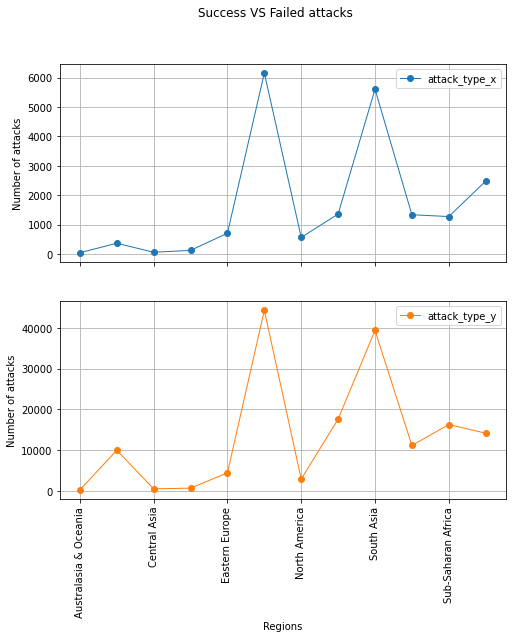

In [ ]:
attacks_combined_final.plot(x='region',y = ["attack_type_x", "attack_type_y"],title = 'Success VS Failed attacks',
                            rot = 90, subplots = True, figsize = (8,8), marker =  'o', grid = True, linewidth = 1,
                            xlabel = "Regions", ylabel = "Number of attacks")